In [20]:


import cv2
import numpy as np 
import glob
from tqdm import tqdm
import PIL.ExifTags
import PIL.Image
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

  0%|          | 0/19 [00:00<?, ?it/s]

Image loaded, Analizying...


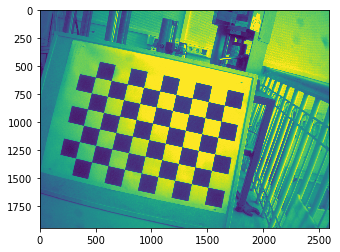

  5%|▌         | 1/19 [00:01<00:21,  1.17s/it]

Chessboard detected!
./calibration_images/left/12.JPG
Image loaded, Analizying...


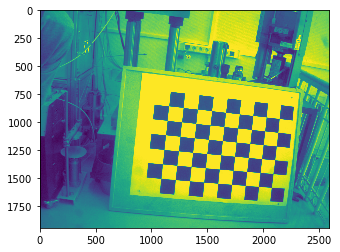

 11%|█         | 2/19 [00:02<00:19,  1.15s/it]

Chessboard detected!
./calibration_images/left/10.JPG
Image loaded, Analizying...


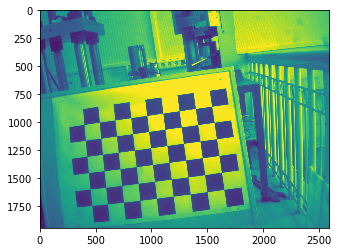

 16%|█▌        | 3/19 [00:04<00:21,  1.35s/it]

Chessboard detected!
./calibration_images/left/11.JPG
Image loaded, Analizying...


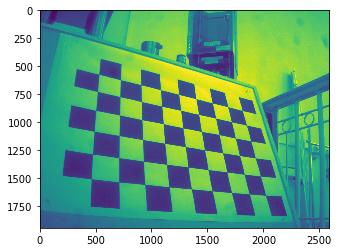

 21%|██        | 4/19 [00:05<00:22,  1.47s/it]

Chessboard detected!
./calibration_images/left/5.JPG
Image loaded, Analizying...


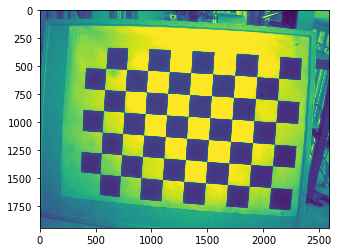

 26%|██▋       | 5/19 [00:06<00:18,  1.32s/it]

Chessboard detected!
./calibration_images/left/15.JPG
Image loaded, Analizying...


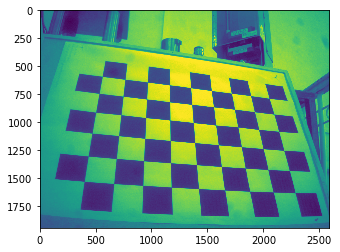

 32%|███▏      | 6/19 [00:08<00:17,  1.37s/it]

Chessboard detected!
./calibration_images/left/6.JPG
Image loaded, Analizying...


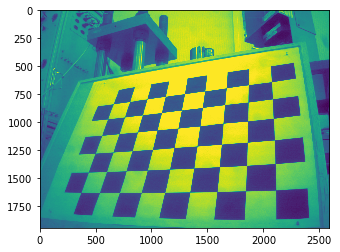

 37%|███▋      | 7/19 [00:09<00:17,  1.42s/it]

Chessboard detected!
./calibration_images/left/8.JPG
Image loaded, Analizying...


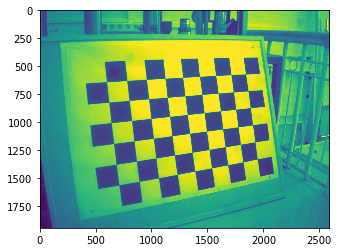

 42%|████▏     | 8/19 [00:10<00:13,  1.27s/it]

Chessboard detected!
./calibration_images/left/2.JPG
Image loaded, Analizying...


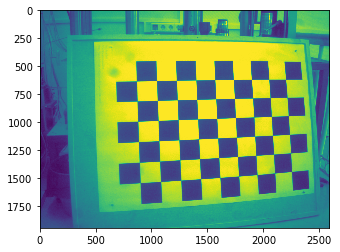

 47%|████▋     | 9/19 [00:11<00:11,  1.20s/it]

Chessboard detected!
./calibration_images/left/1.JPG
Image loaded, Analizying...


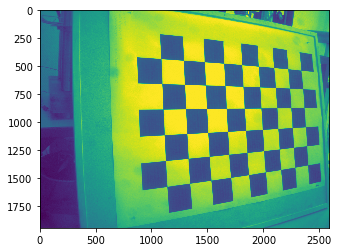

 53%|█████▎    | 10/19 [00:12<00:10,  1.12s/it]

Chessboard detected!
./calibration_images/left/19.JPG
Image loaded, Analizying...


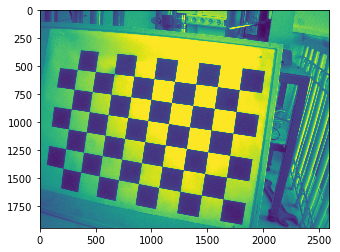

 58%|█████▊    | 11/19 [00:14<00:09,  1.21s/it]

Chessboard detected!
./calibration_images/left/14.JPG
Image loaded, Analizying...


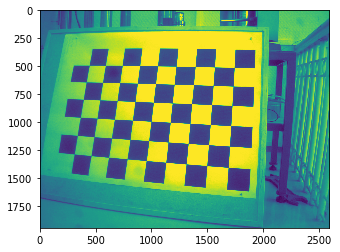

 63%|██████▎   | 12/19 [00:15<00:08,  1.15s/it]

Chessboard detected!
./calibration_images/left/9.JPG
Image loaded, Analizying...


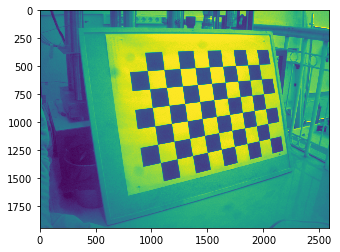

 68%|██████▊   | 13/19 [00:15<00:06,  1.06s/it]

Chessboard detected!
./calibration_images/left/3.JPG
Image loaded, Analizying...


KeyboardInterrupt: 

In [2]:

#============================================
# Camera calibration
#============================================

#Define size of chessboard target. 

chessboard_size = (6,9)
#chessboard_size = (7,5)
#Define arrays to save detected points
obj_points_left = [] #3D points in real world space 
img_points_left = [] #3D points in image plane

#Prepare grid and points to display

objp_left = np.zeros((np.prod(chessboard_size),3),dtype=np.float32)


objp_left[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

#read images

calibration_paths_left = glob.glob('./calibration_images/left/*')

#Iterate over images to find intrinsic matrix
for image_path_left in tqdm(calibration_paths_left):
    plt.clf()
    #Load image
    image = cv2.imread(image_path_left)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Image loaded, Analizying...")
    #find chessboard corners
    plt.imshow(gray_image)
    plt.show()
    ret,corners = cv2.findChessboardCorners(gray_image, chessboard_size, None)

    if ret == True:
        print("Chessboard detected!")
        print(image_path_left)
        #define criteria for subpixel accuracy
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        #refine corner location (to subpixel accuracy) based on criteria.
        cv2.cornerSubPix(gray_image, corners, (5,5), (-1,-1), criteria)
        obj_points_left.append(objp_left)
        img_points_left.append(corners)
    else:
        print("Chessboard wasn't detect!")

ret_left, K_left, dist_left, rvecs_left, tvecs_left = cv2.calibrateCamera(obj_points_left, 
                                                                          img_points_left,
                                                                          gray_image.shape[::-1],
                                                                          None, None)
#=========================================
# analog for right cam
#=========================================


#Define arrays to save detected points
obj_points_right = [] #3D points in real world space 
img_points_right = [] #3D points in image plane

#Prepare grid and points to display

objp_right = np.zeros((np.prod(chessboard_size),3),dtype=np.float32)


objp_right[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

#read images

calibration_paths_right = glob.glob('./calibration_images/right/*')

#Iterate over images to find intrinsic matrix
for image_path_right in tqdm(calibration_paths_right):

    #Load image
    image = cv2.imread(image_path_right)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Image loaded, Analizying...")
    #find chessboard corners
    plt.imshow(gray_image)
    plt.show()
    ret,corners = cv2.findChessboardCorners(gray_image, chessboard_size, None)

    if ret == True:
        print("Chessboard detected!")
        print(image_path_right)
        #define criteria for subpixel accuracy
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        #refine corner location (to subpixel accuracy) based on criteria.
        cv2.cornerSubPix(gray_image, corners, (5,5), (-1,-1), criteria)
        obj_points_right.append(objp_right)
        img_points_right.append(corners)
    else:
        print("Chessboard wasn't detect!")



ret_right, K_right, dist_right, rvecs_right, tvecs_right = cv2.calibrateCamera(obj_points_right,
                                                                               img_points_right,
                                                                               gray_image.shape[::-1], 
                                                                               None, None)
#=========================================
# Calibrate camera
#=========================================
ret, K_left, dist_left, K_right, dist_right, R, T, E, F = cv2.stereoCalibrate(objectPoints = obj_points_left,
                                                                              imagePoints1 = img_points_left, 
                                                                              imagePoints2 = img_points_right, 
                                                                              cameraMatrix1 = K_left, 
                                                                              distCoeffs1 = dist_left,
                                                                              cameraMatrix2 = K_right,
                                                                              distCoeffs2 = dist_right, 
                                                                              imageSize = gray_image.shape[::-1])
#see more obout this parameters : https://docs.opencv.org/2.4/modules/calib3d/doc/calib3d.html


#Save parameters into numpy file
np.save("./camera_params/ret", ret)
np.save("./camera_params/K_left", K_left)
np.save("./camera_params/K_right", K_right)
np.save("./camera_params/dist_left", dist_left)
np.save("./camera_params/dist_right", dist_right)
np.save("./camera_params/R", R)
np.save("./camera_params/T", T)
np.save("./camera_params/E", E)
np.save("./camera_params/F", F)
#np.save("./camera_params/rvecs", rvecs)
#np.save("./camera_params/tvecs", tvecs)


focal_length = 8

#Save focal length
np.save("./camera_params/FocalLength", focal_length)

print("================ Calibration was successful  =================")

#Calculate projection error. 
#mean_error = 0
#for i in range(len(obj_points)):
#    img_points2, _ = cv2.projectPoints(obj_points[i],rvecs[i],tvecs[i], K, dist)
#    error = cv2.norm(img_points[i], img_points2, cv2.NORM_L2)/len(img_points2)
#    mean_error += error

#total_error = mean_error/len(obj_points)
#print (total_error)


In [1]:
import cv2
import numpy as np
import glob
from tqdm import tqdm
import PIL.ExifTags
import PIL.Image
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from tqdm import tqdm


class calibrator:
    def __init__(self, number_cam, fl):
        self.number_cam = number_cam
        self.ret = None
        self.K = None
        self.dist = None
        self.rvecs = None
        self.tvecs = None
        self.focal_length = fl
        self.detected = None
        self.count = None
        self.line_to_images = './calibration_images/' + number_cam + '/*'
        self.line_to_params = "./camera_params/" + number_cam + "/"
        self.obj_points = None
        self.imagePoints1 = None
        self.gray_image_shape = None
        self.image_size = None
        self.detected_image_list = []
        self.line_to_images_new = './calibration_images/new/' + number_cam + '/*'

    def save_params(self):
        # Save parameters into numpy file
        line = self.line_to_params
        np.save(line + "ret", self.ret)
        np.save(line + "K", self.K)
        np.save(line + "dist", self.dist)
        np.save(line + "rvecs", self.rvecs)
        np.save(line + "tvecs", self.tvecs)
        np.save(line + "FocalLength", self.focal_length)

    def calibration_(self):
        # ============================================
        # Camera calibration
        # ============================================

        # Define size of chessboard target.

        chessboard_size = (6, 9)
        # chessboard_size = (7,5)
        # Define arrays to save detected points
        obj_points = []  # 3D points in real world space
        img_points = []  # 3D points in image plane

        # Prepare grid and points to display

        objp = np.zeros((np.prod(chessboard_size), 3), dtype=np.float32)

        objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

        # read images
        line = self.line_to_images_new
        calibration_paths = glob.glob(line)
        calibration_paths.sort()
        t = 0
        y = 0
        # Iterate over images to find intrinsic matrix
        #for image_path in tqdm_notebook(calibration_paths):
        print("Calibration ..." + "\n" + "camera: " + self.number_cam)
        for image_path in tqdm(calibration_paths):

            # Load image
            image = cv2.imread(image_path)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # print("Image loaded, Analizying...")
            # find chessboard corners
            # plt.imshow(gray_image)
            # plt.show()
            ret, corners = cv2.findChessboardCorners(gray_image, chessboard_size, None)

            if ret == True:
                # print("+++++++++++++++++Chessboard detected!+++++++++++++++++")
                # print(image_path)
                # define criteria for subpixel accuracy
                criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
                # refine corner location (to subpixel accuracy) based on criteria.
                cv2.cornerSubPix(gray_image, corners, (5, 5), (-1, -1), criteria)
                obj_points.append(objp)
                img_points.append(corners)
                self.detected_image_list.append(image_path)
                y += 1
            t += 1
        h, w = image.shape[:2]
        self.image_size = (h,w)
        self.detected = y
        self.count = t
        # Calibrate camera
        self.ret, self.K, self.dist, self.rvecs, self.tvecs = cv2.calibrateCamera(obj_points,
                                                                                  img_points,
                                                                                  gray_image.shape[::-1],
                                                                                  None, None)
        self.obj_points = obj_points
        self.img_points = img_points
        self.gray_image_shape = gray_image.shape[::-1]
        print("================ Calibration was successful  =================")

    def calibration_cam(self):
        self.calibration_()
        self.save_params()
        print("There were only images: " + str(self.count) + "\n" + "There were a total of images found: " + str(
            self.detected))


    def make_detected_image_list(self):

        # read images
        line = self.line_to_images
        calibration_paths = glob.glob(line)
        chessboard_size = (6, 9)
        print("Make detected_image_list, camera: " + self.number_cam)
        for image_path in tqdm(calibration_paths):

            # Load image
            image = cv2.imread(image_path)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            ret, corners = cv2.findChessboardCorners(gray_image, chessboard_size, None)

            if ret == True:
                self.detected_image_list.append(image_path[len(self.line_to_images)-1:])



class stereo_calibrator:
    def __init__(self, number_cam_left, number_cam_right, fl_left, fl_right):
        self.number_cam_left = number_cam_left
        self.number_cam_right = number_cam_right
        self.link_to_recreate = './calibration_images/new/'
        self.calibrovka_left = calibrator(number_cam_left, fl_left)
        self.calibrovka_right = calibrator(number_cam_right, fl_right)

    def stereo_calibration_separately(self):
        self.calibrovka_left.calibration_cam()
        self.calibrovka_right.calibration_cam()


    def stereo_calibration_together(self):
        ret, K_left, dist_left, K_right, dist_right, R, T, E, F = cv2.stereoCalibrate(
            objectPoints=self.calibrovka_left.obj_points,
            imagePoints1=self.calibrovka_left.img_points,
            imagePoints2=self.calibrovka_right.img_points,
            cameraMatrix1=self.calibrovka_left.K,
            distCoeffs1=self.calibrovka_left.dist,
            cameraMatrix2=self.calibrovka_right.K,
            distCoeffs2=self.calibrovka_right.dist,
            imageSize=self.calibrovka_left.gray_image_shape)
        # see more obout this parameters : https://docs.opencv.org/2.4/modules/calib3d/doc/calib3d.html

        link = "./camera_params/stereo_params/"
        # Save parameters into numpy file
        np.save(link + "ret", ret)
        np.save(link + "K_left", K_left)
        np.save(link + "K_right", K_right)
        np.save(link + "dist_left", dist_left)
        np.save(link + "dist_right", dist_right)
        np.save(link + "R", R)
        np.save(link + "T", T)
        np.save(link + "E", E)
        np.save(link + "F", F)
        np.save(link + "image_size", self.calibrovka_left.image_size)
        print("================ Stereocalibration was successful  =================")

    def stereo_calibration(self):
    	self.selection()
    	#self.stereo_calibration_separately()
    	#self.stereo_calibration_together()
    	
    def re_create_data_images(self):
        ll = self.calibrovka_left.detected_image_list
        lr = self.calibrovka_right.detected_image_list
        print("Re-create data images")

        for l in tqdm(ll):
            if l in lr:
                
                image_left = cv2.imread(self.calibrovka_left.line_to_images[:-1] + l)
                image_right = cv2.imread(self.calibrovka_right.line_to_images[:-1] + l)
                cv2.imwrite(self.link_to_recreate + self.calibrovka_left.number_cam + '/' + l, image_left)
                cv2.imwrite(self.link_to_recreate + self.calibrovka_right.number_cam + '/' + l, image_right)

    def selection(self):
    	self.calibrovka_left.make_detected_image_list()
    	self.calibrovka_right.make_detected_image_list()
    	self.re_create_data_images()



In [2]:

name_left = "25797059"
name_right = "25791059"
calib = stereo_calibrator(name_left, name_right, 8, 8)
#calib.calibrovka_left.detected_image_list = list1
#calib.calibrovka_right.detected_image_list = list2

In [3]:
calib.stereo_calibration()

  0%|          | 0/304 [00:00<?, ?it/s]

Make detected_image_list, camera: 25797059


  0%|          | 0/304 [00:00<?, ?it/s]

Make detected_image_list, camera: 25791059


  0%|          | 0/301 [00:00<?, ?it/s]

Re-create data images


100%|██████████| 301/301 [05:53<00:00,  1.20s/it]


### l = calib.calibrovka_left.detected_image_list[0]

In [86]:
calib.re_create_data_images()

  0%|          | 0/301 [00:00<?, ?it/s]

Re-create data images


  7%|▋         | 21/301 [00:24<05:38,  1.21s/it]

KeyboardInterrupt: 

In [36]:
calib.calibrovka_left.line_to_images + calib.calibrovka_left.detected_image_list[0]

'./calibration_images/25797059/*261.png'

In [37]:
calib.calibrovka_left.line_to_images[:-1]

'./calibration_images/25797059/'

In [42]:
a = cv2.imread(calib.calibrovka_left.line_to_images[:-1] + calib.calibrovka_left.detected_image_list[0])

In [43]:
cv2.imwrite('hbwncsjdmlk.png', a)

True

In [45]:
calib.link_to_recreate + calib.calibrovka_left.number_cam + '/' + l

'./calibration_images/new/25797059/261.png'

In [46]:
cv2.imwrite(calib.link_to_recreate + calib.calibrovka_left.number_cam + '/' + 'ucnsdj.png', a)

True

In [49]:
def re_create_data_images(colib):
    ll = colib.calibrovka_left.detected_image_list
    lr = colib.calibrovka_right.detected_image_list
    print("Re-create data images")
    for l in tqdm(ll):
        if l in lr:
            image_left = cv2.imread(colib.calibrovka_left.line_to_images[:-1] + l)
            image_right = cv2.imread(colib.calibrovka_right.line_to_images[:-1] + l)
            cv2.imwrite(colib.link_to_recreate + colib.calibrovka_left.number_cam + '/' + l, image_left)
            cv2.imwrite(colib.link_to_recreate + colib.calibrovka_right.number_cam + '/' + l, image_right)

In [50]:
re_create_data_images(calib)

  0%|          | 0/301 [00:00<?, ?it/s]

Re-create data images


100%|██████████| 301/301 [05:26<00:00,  1.06s/it]


In [51]:
list1 = calib.calibrovka_left.detected_image_list
list2 = calib.calibrovka_right.detected_image_list

In [67]:
list1 = ['261.png',
 '14.png',
 '74.png',
 '211.png',
 '240.png',
 '80.png',
 '19.png',
 '120.png',
 '79.png',
 '297.png',
 '12.png',
 '115.png',
 '140.png',
 '61.png',
 '268.png',
 '86.png',
 '147.png',
 '44.png',
 '247.png',
 '264.png',
 '173.png',
 '226.png',
 '251.png',
 '15.png',
 '92.png',
 '69.png',
 '237.png',
 '51.png',
 '214.png',
 '294.png',
 '49.png',
 '151.png',
 '27.png',
 '269.png',
 '193.png',
 '168.png',
 '178.png',
 '71.png',
 '218.png',
 '21.png',
 '159.png',
 '65.png',
 '206.png',
 '145.png',
 '207.png',
 '172.png',
 '107.png',
 '110.png',
 '116.png',
 '26.png',
 '62.png',
 '87.png',
 '88.png',
 '10.png',
 '275.png',
 '143.png',
 '227.png',
 '45.png',
 '295.png',
 '267.png',
 '289.png',
 '165.png',
 '141.png',
 '259.png',
 '149.png',
 '83.png',
 '166.png',
 '94.png',
 '63.png',
 '135.png',
 '183.png',
 '103.png',
 '160.png',
 '196.png',
 '263.png',
 '265.png',
 '163.png',
 '43.png',
 '144.png',
 '216.png',
 '1.png',
 '137.png',
 '279.png',
 '52.png',
 '28.png',
 '228.png',
 '76.png',
 '8.png',
 '182.png',
 '126.png',
 '22.png',
 '242.png',
 '95.png',
 '210.png',
 '84.png',
 '198.png',
 '235.png',
 '85.png',
 '239.png',
 '0.png',
 '219.png',
 '260.png',
 '34.png',
 '299.png',
 '187.png',
 '156.png',
 '250.png',
 '46.png',
 '112.png',
 '176.png',
 '213.png',
 '223.png',
 '270.png',
 '3.png',
 '38.png',
 '130.png',
 '179.png',
 '186.png',
 '32.png',
 '181.png',
 '155.png',
 '17.png',
 '271.png',
 '4.png',
 '278.png',
 '100.png',
 '57.png',
 '252.png',
 '189.png',
 '133.png',
 '245.png',
 '55.png',
 '167.png',
 '273.png',
 '91.png',
 '231.png',
 '171.png',
 '6.png',
 '192.png',
 '108.png',
 '217.png',
 '158.png',
 '67.png',
 '53.png',
 '197.png',
 '109.png',
 '248.png',
 '106.png',
 '285.png',
 '276.png',
 '33.png',
 '203.png',
 '180.png',
 '287.png',
 '56.png',
 '201.png',
 '96.png',
 '98.png',
 '134.png',
 '2.png',
 '16.png',
 '128.png',
 '274.png',
 '303.png',
 '188.png',
 '66.png',
 '48.png',
 '253.png',
 '302.png',
 '222.png',
 '292.png',
 '290.png',
 '246.png',
 '200.png',
 '105.png',
 '5.png',
 '150.png',
 '256.png',
 '70.png',
 '254.png',
 '142.png',
 '127.png',
 '119.png',
 '114.png',
 '90.png',
 '152.png',
 '208.png',
 '131.png',
 '169.png',
 '104.png',
 '174.png',
 '122.png',
 '81.png',
 '99.png',
 '124.png',
 '257.png',
 '164.png',
 '293.png',
 '194.png',
 '281.png',
 '25.png',
 '123.png',
 '78.png',
 '266.png',
 '117.png',
 '29.png',
 '64.png',
 '20.png',
 '229.png',
 '93.png',
 '291.png',
 '283.png',
 '73.png',
 '50.png',
 '59.png',
 '129.png',
 '170.png',
 '161.png',
 '136.png',
 '258.png',
 '162.png',
 '215.png',
 '232.png',
 '230.png',
 '23.png',
 '102.png',
 '296.png',
 '284.png',
 '18.png',
 '146.png',
 '262.png',
 '199.png',
 '138.png',
 '13.png',
 '221.png',
 '36.png',
 '111.png',
 '272.png',
 '47.png',
 '39.png',
 '224.png',
 '175.png',
 '7.png',
 '148.png',
 '288.png',
 '139.png',
 '241.png',
 '113.png',
 '243.png',
 '31.png',
 '35.png',
 '202.png',
 '11.png',
 '244.png',
 '121.png',
 '40.png',
 '89.png',
 '300.png',
 '209.png',
 '157.png',
 '154.png',
 '238.png',
 '30.png',
 '153.png',
 '118.png',
 '195.png',
 '212.png',
 '286.png',
 '233.png',
 '177.png',
 '236.png',
 '191.png',
 '58.png',
 '225.png',
 '42.png',
 '298.png',
 '82.png',
 '190.png',
 '9.png',
 '280.png',
 '41.png',
 '301.png',
 '54.png',
 '77.png',
 '24.png',
 '184.png',
 '282.png',
 '132.png',
 '249.png',
 '125.png',
 '68.png',
 '204.png',
 '185.png',
 '255.png',
 '37.png',
 '234.png',
 '205.png',
 '72.png',
 '220.png',
 '97.png',
 '75.png']
list2 = ['261.png',
 '14.png',
 '74.png',
 '211.png',
 '240.png',
 '80.png',
 '19.png',
 '120.png',
 '79.png',
 '297.png',
 '12.png',
 '115.png',
 '140.png',
 '61.png',
 '268.png',
 '86.png',
 '147.png',
 '44.png',
 '247.png',
 '264.png',
 '173.png',
 '226.png',
 '251.png',
 '15.png',
 '92.png',
 '69.png',
 '237.png',
 '51.png',
 '214.png',
 '294.png',
 '49.png',
 '151.png',
 '27.png',
 '269.png',
 '193.png',
 '168.png',
 '178.png',
 '71.png',
 '218.png',
 '21.png',
 '159.png',
 '65.png',
 '206.png',
 '145.png',
 '207.png',
 '172.png',
 '107.png',
 '110.png',
 '116.png',
 '26.png',
 '62.png',
 '87.png',
 '88.png',
 '10.png',
 '275.png',
 '143.png',
 '227.png',
 '45.png',
 '295.png',
 '267.png',
 '289.png',
 '165.png',
 '141.png',
 '259.png',
 '149.png',
 '83.png',
 '166.png',
 '94.png',
 '63.png',
 '135.png',
 '183.png',
 '103.png',
 '160.png',
 '196.png',
 '263.png',
 '265.png',
 '163.png',
 '43.png',
 '144.png',
 '216.png',
 '1.png',
 '137.png',
 '279.png',
 '52.png',
 '28.png',
 '228.png',
 '76.png',
 '8.png',
 '182.png',
 '126.png',
 '22.png',
 '242.png',
 '95.png',
 '210.png',
 '84.png',
 '198.png',
 '235.png',
 '85.png',
 '239.png',
 '0.png',
 '219.png',
 '260.png',
 '34.png',
 '299.png',
 '187.png',
 '156.png',
 '250.png',
 '46.png',
 '176.png',
 '213.png',
 '223.png',
 '270.png',
 '3.png',
 '38.png',
 '130.png',
 '179.png',
 '186.png',
 '32.png',
 '181.png',
 '155.png',
 '17.png',
 '271.png',
 '4.png',
 '278.png',
 '100.png',
 '57.png',
 '252.png',
 '189.png',
 '133.png',
 '245.png',
 '55.png',
 '167.png',
 '273.png',
 '91.png',
 '231.png',
 '171.png',
 '6.png',
 '192.png',
 '108.png',
 '217.png',
 '158.png',
 '67.png',
 '53.png',
 '197.png',
 '109.png',
 '248.png',
 '106.png',
 '285.png',
 '276.png',
 '33.png',
 '203.png',
 '180.png',
 '287.png',
 '56.png',
 '201.png',
 '96.png',
 '98.png',
 '134.png',
 '2.png',
 '16.png',
 '128.png',
 '274.png',
 '303.png',
 '188.png',
 '66.png',
 '48.png',
 '253.png',
 '302.png',
 '222.png',
 '292.png',
 '290.png',
 '246.png',
 '200.png',
 '105.png',
 '5.png',
 '150.png',
 '256.png',
 '70.png',
 '254.png',
 '142.png',
 '127.png',
 '119.png',
 '114.png',
 '90.png',
 '152.png',
 '208.png',
 '131.png',
 '169.png',
 '104.png',
 '174.png',
 '122.png',
 '81.png',
 '99.png',
 '124.png',
 '257.png',
 '164.png',
 '293.png',
 '194.png',
 '281.png',
 '25.png',
 '123.png',
 '78.png',
 '266.png',
 '117.png',
 '29.png',
 '64.png',
 '20.png',
 '229.png',
 '93.png',
 '291.png',
 '283.png',
 '73.png',
 '50.png',
 '59.png',
 '129.png',
 '170.png',
 '136.png',
 '258.png',
 '162.png',
 '215.png',
 '232.png',
 '230.png',
 '23.png',
 '102.png',
 '296.png',
 '284.png',
 '18.png',
 '146.png',
 '262.png',
 '199.png',
 '138.png',
 '13.png',
 '221.png',
 '36.png',
 '111.png',
 '272.png',
 '47.png',
 '39.png',
 '224.png',
 '175.png',
 '7.png',
 '148.png',
 '288.png',
 '139.png',
 '241.png',
 '113.png',
 '243.png',
 '31.png',
 '35.png',
 '202.png',
 '11.png',
 '244.png',
 '121.png',
 '40.png',
 '89.png',
 '300.png',
 '209.png',
 '157.png',
 '154.png',
 '238.png',
 '30.png',
 '153.png',
 '118.png',
 '195.png',
 '212.png',
 '286.png',
 '233.png',
 '177.png',
 '236.png',
 '191.png',
 '58.png',
 '225.png',
 '42.png',
 '298.png',
 '82.png',
 '190.png',
 '9.png',
 '280.png',
 '41.png',
 '301.png',
 '54.png',
 '77.png',
 '24.png',
 '184.png',
 '282.png',
 '132.png',
 '249.png',
 '125.png',
 '68.png',
 '204.png',
 '185.png',
 '255.png',
 '37.png',
 '234.png',
 '205.png',
 '72.png',
 '220.png',
 '97.png',
 '75.png']

In [19]:
a = glob.glob("./calibration_images/new/25791059/*")

In [20]:
a.sort()

In [21]:
a

['./calibration_images/new/25791059/0.png',
 './calibration_images/new/25791059/1.png',
 './calibration_images/new/25791059/10.png',
 './calibration_images/new/25791059/100.png',
 './calibration_images/new/25791059/102.png',
 './calibration_images/new/25791059/103.png',
 './calibration_images/new/25791059/104.png',
 './calibration_images/new/25791059/105.png',
 './calibration_images/new/25791059/106.png',
 './calibration_images/new/25791059/107.png',
 './calibration_images/new/25791059/108.png',
 './calibration_images/new/25791059/109.png',
 './calibration_images/new/25791059/11.png',
 './calibration_images/new/25791059/110.png',
 './calibration_images/new/25791059/111.png',
 './calibration_images/new/25791059/113.png',
 './calibration_images/new/25791059/114.png',
 './calibration_images/new/25791059/115.png',
 './calibration_images/new/25791059/116.png',
 './calibration_images/new/25791059/117.png',
 './calibration_images/new/25791059/118.png',
 './calibration_images/new/25791059/119.